# Data Science Immersive Project 2 
###  -- Ames Housing Data and Kaggle Challenge --



### 0. Define Problem
- What are the properties of house that make the house get the good selling price? such as size of area, car area, number of Bedroom etc. 
- The purpose of this study is a guideline for house agency staffs to find the high price house and get more commission.


### 1. Data Preparation
- Load data dictionary from 'http://jse.amstat.org/v19n3/decock/DataDocumentation.txt'
- Mapping column name from data dict and Data source
- Replace the null values by proper values based on data dict type [ numerical or category ]
- Convert the category values in Ordinal cols to be the scale discreate values

### 2. EDA and Feature Engineering
- Encode the category cols by using OneHotEncoder
- normalization by using StandardScaler

### 3. Get pre-predictos from correlation between features and target 
- Get Cols which have the high correlation with target (SalePrice)

### 4. First Liner Regression Model 
- Create X_train from pre-predictos list
- Split data to X,y Train and Test
- Evaluate the model

### 5. Perform Regularization (Lasso) to get Optimal Predictors
- get the best Lasso alpha for Training data
- remove features which have coeffienct equal to zero from the pre-predictos list, get the optimal-predictor list

### 6.Optimal Liner Regression Model by using Optimal Predictors
- Create X_train from optimal-predictos list
- Evaluate the model

### 7. Get prediction result from X_test and run Kaggle Challenge

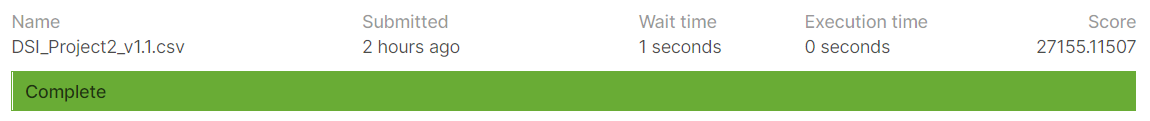


### Conclusion 

Top three features that make the house get a better price are:
1. Size of the Ground living area
    * every one square feet step up, the price increase about 24,633 US dollar 


2. Rates of the overall material quality
    * every one rate step up, the price increase about 18,854 US dollar


3. Size of basement area
    * every one square feet step up, the price increase about 14,928 US dollar
    
### House agency staffs should focus on house that has big groud living and basement area and also good material quality then they get high commision. 




# 1. Data Preparation

### Load packages and data.

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,OneHotEncoder
from sklearn import metrics

import missingno as msno

In [2]:
# read data source to dataframe
AmesHousing = pd.read_csv('datasets/train.csv')
AmesHousing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
AmesHousing.shape

(2051, 81)

In [4]:
AmesHousing.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [5]:
AmesHousing.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


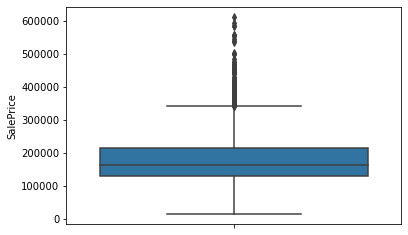

In [136]:
# boxplot of Taget
sns.boxplot(y=AmesHousing_train['SalePrice'])
plt.show()

### Load data dictionary 
 from 'http://jse.amstat.org/v19n3/decock/DataDocumentation.txt'

### Get columns types [ Continous, Discreate, Nominal, Ordinal ]

In [6]:
# load data dit from 'http://jse.amstat.org/v19n3/decock/DataDocumentation.txt' 
# keep cols in 4 lists base on type in data dict
# result_Continuous contains name of cols which values are Continuous
# result_Discrete   contains name of cols which values are Discrete
# result_Ordinal    contains name of cols which values are Ordinal
# result_Nominal    contains name of cols which values are Nominal 

import requests
import re
target_url = 'http://jse.amstat.org/v19n3/decock/DataDocumentation.txt'
response = requests.get(target_url)
data = response.text
n_date = re.compile('^.*\(Nominal\)')
result_Nominal = []
for line in data.splitlines():
    result_Nominal += re.findall(n_date, line)
#print(result_Nominal)
n_date = re.compile('^.*\(Continuous\)')
result_Continuous = []
for line in data.splitlines():
    result_Continuous += re.findall(n_date, line)
#print(result_Continuous)
n_date = re.compile('^.*\(Discrete\)')
result_Discrete = []
for line in data.splitlines():
    result_Discrete += re.findall(n_date, line)
#print(result_Discrete)
n_date = re.compile('^.*\(Ordinal\)')
result_Ordinal = []
for line in data.splitlines():
    result_Ordinal += re.findall(n_date, line)
#print(result_Ordinal)

In [7]:
# result_Continuous contains name of cols which values are Continuous
 
result_Continuous = [sub.replace(' (Continuous)', '') for sub in result_Continuous] 
result_Continuous = [sub.replace('\t(Continuous)', '') for sub in result_Continuous] 

In [8]:
# result_Discrete   contains name of cols which values are Discrete

result_Discrete = [sub.replace(' (Discrete)', '') for sub in result_Discrete] 
result_Discrete = [sub.replace('\t(Discrete)', '') for sub in result_Discrete] 
result_Discrete.remove('Order')

In [9]:
# result_Ordinal    contains name of cols which values are Ordinal

result_Ordinal = [sub.replace(' (Ordinal)', '') for sub in result_Ordinal] 
result_Ordinal = [sub.replace('\t(Ordinal)', '') for sub in result_Ordinal] 
result_Ordinal = [sub.replace('\t(Ordinal)', '') for sub in result_Ordinal] 

In [10]:
# result_Nominal    contains name of cols which values are Nominal 

result_Nominal = [sub.replace(' (Nominal)', '') for sub in result_Nominal] 
result_Nominal = [sub.replace('\t(Nominal)', '') for sub in result_Nominal] 
result_Nominal.remove('Sale Condition')

### Data cleaning

### Mapping column name from data dict and Data source

In [11]:
# all cols from data dict
all_datadict_col = result_Continuous + result_Discrete + result_Nominal +result_Ordinal

In [12]:
# all cols from data source
AmesHousing.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [13]:
# see diffrent cols
set(all_datadict_col) - set(AmesHousing.columns) 

{'3-Ssn Porch',
 'Bedroom',
 'BsmtFinType 2',
 'Exterior 1',
 'Exterior 2',
 'FireplaceQu',
 'HeatingQC',
 'Kitchen',
 'KitchenQual',
 'TotRmsAbvGrd'}

In [14]:
# see diffrent cols
set(AmesHousing.columns) - set(all_datadict_col) 

{'3Ssn Porch',
 'Bedroom AbvGr',
 'BsmtFin Type 2',
 'Exterior 1st',
 'Exterior 2nd',
 'Fireplace Qu',
 'Heating QC',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd'}

In [15]:
# correct the col name base on data dict
dict_rename = {'Bedroom AbvGr':'Bedroom',
               'Kitchen AbvGr': 'Kitchen',
               'Fireplace Qu': 'FireplaceQu',
               'TotRms AbvGrd': 'TotRmsAbvGrd',
               'BsmtFin Type 2': 'BsmtFinType 2',
               '3Ssn Porch': '3-Ssn Porch',
               'Exterior 1st': 'Exterior 1',
               'Exterior 2nd': 'Exterior 2',
               'Heating QC': 'HeatingQC',
               'Kitchen Qual': 'KitchenQual',
    
}
AmesHousing.rename(columns=dict_rename, inplace=True)

In [16]:
#check the difference
set(all_datadict_col) - set(AmesHousing.columns) 

set()

In [17]:
#check the difference
set(AmesHousing.columns) - set(all_datadict_col) 

{'Id'}

### Missing Data value

###  Find all cols which have  null value

In [18]:
#function to get all cols which have null values
def get_null_col_series(df):
    null_col_series_tmp = df.isnull().sum().sort_values(ascending=False)
    null_col_series_tmp = null_col_series_tmp[null_col_series_tmp >= 1]
    #print(null_col_series_tmp)
    return null_col_series_tmp

In [19]:
#get all cols which have null values in list
null_col_series = get_null_col_series(AmesHousing)
null_col_series[:10]

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
FireplaceQu      1000
Lot Frontage      330
Garage Finish     114
Garage Cond       114
Garage Qual       114
Garage Yr Blt     114
dtype: int64

In [20]:
null_col_series.shape

(26,)

<AxesSubplot:>

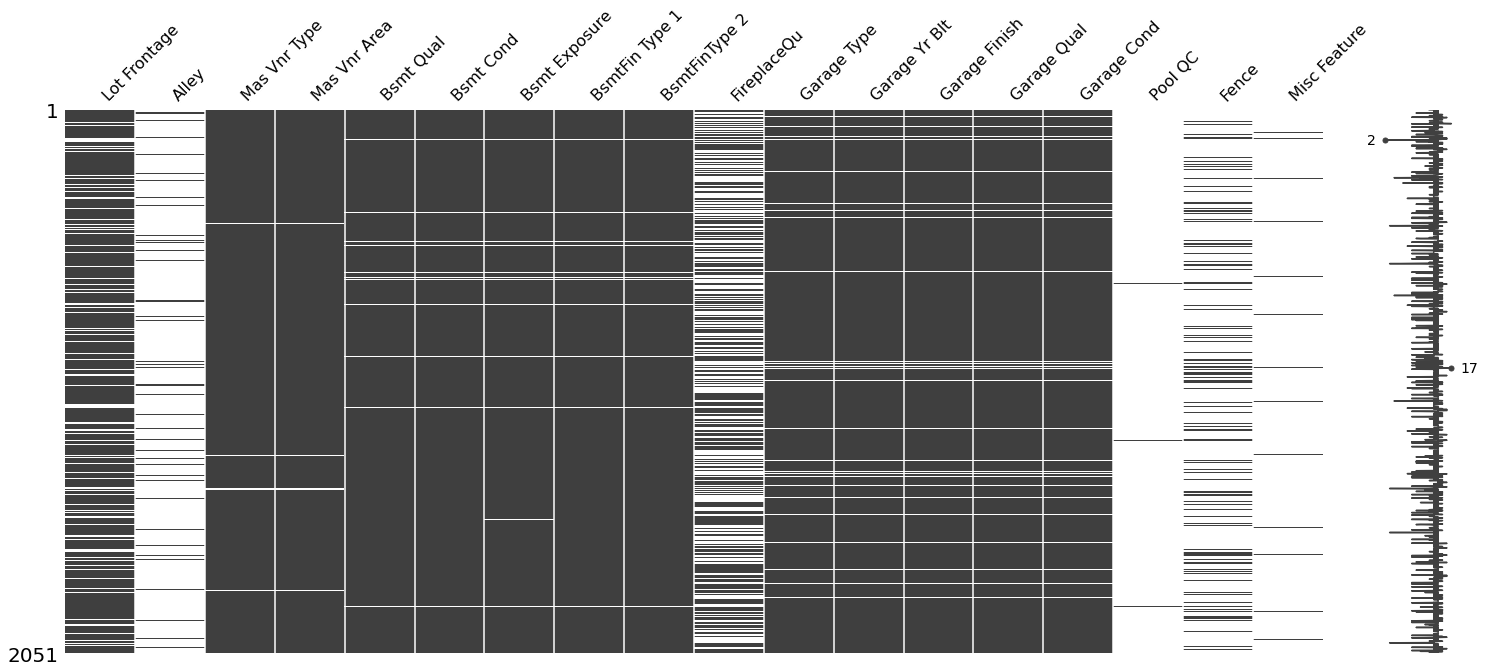

In [21]:
#show the all cols that has null value in graph
filtered_data = msno.nullity_filter(AmesHousing, filter='bottom', n=26, p=0.999) 
msno.matrix(filtered_data)


In [22]:
#msno.heatmap(filtered_data)  #for all have null value

   ### Replace the null values by proper values based on data dict type [ numerical or category ]

In [23]:
# function to classify the data dict col type and put into the dictionnary variable
def get_dict_type_col_null(null_col_series_tmp):
    col_null_all_type = null_col_series_tmp.index.values.tolist() 
    dict_type_col_null_tmp = {}
    col_discrete_null = []
    col_nominal_null = []
    col_ordinal_null = []
    col_continuous_null = []
    for col in col_null_all_type:
        if col in result_Discrete:
            #print(col,'is discreate')
            col_discrete_null.append(col)
        elif col in result_Nominal:
            #print(col,'is nominal')
            col_nominal_null.append(col)
        elif col in result_Ordinal:
            #print(col,'is ordinal')
            col_ordinal_null.append(col)
        elif col in result_Continuous:
            #print(col,'is continuous')
            col_continuous_null.append(col)
    dict_type_col_null_tmp['discreate'] = col_discrete_null
    dict_type_col_null_tmp['nominal'] = col_nominal_null
    dict_type_col_null_tmp['ordinal'] = col_ordinal_null
    dict_type_col_null_tmp['continuous'] = col_continuous_null
    #for k,v in dict_type_col_null.items():
        #print(k,v)
    return dict_type_col_null_tmp


In [24]:
# call function to classify the data dict col type 
# get the dictionnary variable which contain null cols by data dict type
dict_type_col_null = get_dict_type_col_null(null_col_series)
dict_type_col_null

{'discreate': ['Garage Yr Blt',
  'Bsmt Half Bath',
  'Bsmt Full Bath',
  'Garage Cars'],
 'nominal': ['Misc Feature', 'Alley', 'Garage Type', 'Mas Vnr Type'],
 'ordinal': ['Pool QC',
  'Fence',
  'FireplaceQu',
  'Garage Finish',
  'Garage Cond',
  'Garage Qual',
  'Bsmt Exposure',
  'BsmtFinType 2',
  'BsmtFin Type 1',
  'Bsmt Cond',
  'Bsmt Qual'],
 'continuous': ['Lot Frontage',
  'Mas Vnr Area',
  'Garage Area',
  'Bsmt Unf SF',
  'BsmtFin SF 2',
  'Total Bsmt SF',
  'BsmtFin SF 1']}

In [25]:
# Function to replace the null value
def change_col_null_value(df,df_2,col_lst,change):
    for col in col_lst:
        if change == 'median':
            df_2[col] = df_2[col].fillna(df[col].median())
        elif change == 'mean':
            df_2[col] = df_2[col].fillna(df[col].mean())
        elif change == 'NONE':
            df_2[col] = df_2[col].fillna('NONE')


In [26]:
# call Function to replace the null value base on data dict type   
# for null value in nomial and ordinal cols, the data dict define that it is no that thing
#so we replace with NONE string
#such as null in Garage Qual
#Garage Qual (Ordinal): Garage quality
#       Ex	Excellent
#       Gd	Good
#       TA	Typical/Average
#       Fa	Fair
#       Po	Poor
#       NA	No Garage
change_col_null_value(AmesHousing,AmesHousing,dict_type_col_null['discreate'],'median')
change_col_null_value(AmesHousing,AmesHousing,dict_type_col_null['continuous'],'mean')
change_col_null_value(AmesHousing,AmesHousing,dict_type_col_null['nominal'],'NONE')
change_col_null_value(AmesHousing,AmesHousing,dict_type_col_null['ordinal'],'NONE')

In [27]:
# checking there is no null value
AmesHousing.isnull().sum().sort_values(ascending=False).head(5)

SalePrice         0
Total Bsmt SF     0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
dtype: int64

# 2. EDA and Feature Engineering

In [28]:
AmesHousing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,NONE,IR1,Lvl,...,0,0,NONE,NONE,NONE,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NONE,IR1,Lvl,...,0,0,NONE,NONE,NONE,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NONE,Reg,Lvl,...,0,0,NONE,NONE,NONE,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NONE,Reg,Lvl,...,0,0,NONE,NONE,NONE,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NONE,IR1,Lvl,...,0,0,NONE,NONE,NONE,0,3,2010,WD,138500


In [29]:
AmesHousing.shape

(2051, 81)

In [30]:
# create the Year value to be the aging
AmesHousing['Year Built'] = 2020 - AmesHousing['Year Built']
AmesHousing['Year Remod/Add'] = 2020 - AmesHousing['Year Remod/Add']
AmesHousing['Garage Yr Blt'] = 2020 - AmesHousing['Garage Yr Blt']
AmesHousing.shape

(2051, 81)

### Convert the category values in Ordinal cols to be the scale discreate values
We scale and rank value by information in the data dictionary

In [31]:
map_dict_Fence = { 'GdPrv': 4,
                       'MnPrv': 3,
                       'GdWo': 2,
                       'MnWw': 1,
                       'NONE': 0}
AmesHousing['Fence'] = AmesHousing['Fence'].map(map_dict_Fence) 

In [32]:
map_dict_Pool_QC = { 'Ex': 4,
                       'Gd': 3,
                       'TA': 2,
                       'Fa': 1,
                       'NONE': 0}
AmesHousing['Pool QC'] = AmesHousing['Pool QC'].map(map_dict_Pool_QC) 

In [33]:
map_dict_Paved_Drive = { 'Y': 2,
                       'P': 1,
                       'N': 0}
AmesHousing['Paved Drive'] = AmesHousing['Paved Drive'].map(map_dict_Paved_Drive) 

In [34]:
map_dict_Garage_Cond = { 'Ex': 5,
                       'Gd': 4,
                       'TA': 3,
                       'Fa': 2,
                       'Po': 1,
                       'NONE': 0}
AmesHousing['Garage Cond'] = AmesHousing['Garage Cond'].map(map_dict_Garage_Cond) 

In [35]:
map_dict_Garage_Qual = { 'Ex': 5,
                       'Gd': 4,
                       'TA': 3,
                       'Fa': 2,
                       'Po': 1,
                       'NONE': 0}
AmesHousing['Garage Qual'] = AmesHousing['Garage Qual'].map(map_dict_Garage_Qual) 

In [36]:
map_dict_Garage_Finish = { 'Fin': 3,
                       'RFn': 2,
                       'Unf': 1,
                       'NONE': 0}
AmesHousing['Garage Finish'] = AmesHousing['Garage Finish'].map(map_dict_Garage_Finish) 

In [37]:
map_dict_FireplaceQu = { 'Ex': 5,
                       'Gd': 4,
                       'TA': 3,
                       'Fa': 2,
                       'Po': 1,
                       'NONE': 0}
AmesHousing['FireplaceQu'] = AmesHousing['FireplaceQu'].map(map_dict_FireplaceQu) 

In [38]:
map_dict_Functional = { 'Typ': 7,
                       'Min1': 6,
                       'Min2': 5,
                       'Mod': 4,
                       'Maj1': 3,
                       'Maj2': 2,
                       'Sev': 1,
                       'Sal': 0}
AmesHousing['Functional'] = AmesHousing['Functional'].map(map_dict_Functional) 

In [39]:
map_dict_KitchenQual = { 'Ex': 4,
                       'Gd': 3,
                       'TA': 2,
                       'Fa': 1,
                       'Po': 0}
AmesHousing['KitchenQual'] = AmesHousing['KitchenQual'].map(map_dict_KitchenQual) 

In [40]:
map_dict_Electrical = { 'SBrkr': 4,
                       'FuseA': 3,
                       'FuseF': 2,
                       'FuseP': 1,
                       'Mix': 0,
                      'NONE': 4}
AmesHousing['Electrical'] = AmesHousing['Electrical'].map(map_dict_Electrical)

In [41]:
map_dict_HeatingQC = { 'Ex': 4,
                       'Gd': 3,
                       'TA': 2,
                       'Fa': 1,
                       'Po': 0}
AmesHousing['HeatingQC'] = AmesHousing['HeatingQC'].map(map_dict_HeatingQC) 

In [42]:
map_dict_BsmtFin_Type_2 = { 'GLQ': 6,
                       'ALQ': 5,
                       'BLQ': 4,
                       'Rec': 3,
                       'LwQ': 2,
                       'Unf': 1,
                       'NONE': 0}
AmesHousing['BsmtFinType 2'] = AmesHousing['BsmtFinType 2'].map(map_dict_BsmtFin_Type_2) 

In [43]:
map_dict_BsmtFin_Type_1 = { 'GLQ': 6,
                       'ALQ': 5,
                       'BLQ': 4,
                       'Rec': 3,
                       'LwQ': 2,
                       'Unf': 1,
                       'NONE': 0}
AmesHousing['BsmtFin Type 1'] = AmesHousing['BsmtFin Type 1'].map(map_dict_BsmtFin_Type_1) 

In [44]:
map_dict_Bsmt_Exposure = { 'Gd': 4,
                       'Av': 3,
                       'Mn': 2,
                       'No': 1,
                       'NONE': 0}
AmesHousing['Bsmt Exposure'] = AmesHousing['Bsmt Exposure'].map(map_dict_Bsmt_Exposure) 

In [45]:
map_dict_Bsmt_Qual = { 'Ex': 5,
                       'Gd': 4,
                       'TA': 3,
                       'Fa': 2,
                       'Po': 1,
                       'NONE': 0}
AmesHousing['Bsmt Qual'] = AmesHousing['Bsmt Qual'].map(map_dict_Bsmt_Qual) 

In [46]:
map_dict_Land_Slope = { 'Gtl': 2,
                       'Mod': 1,
                       'Sev': 0}
AmesHousing['Land Slope'] = AmesHousing['Land Slope'].map(map_dict_Land_Slope) 

In [47]:
map_dict_Lot_Shape = { 'Reg': 3,
                       'IR1': 2,
                       'IR2': 1,
                       'IR3': 0}
AmesHousing['Lot Shape'] = AmesHousing['Lot Shape'].map(map_dict_Lot_Shape) 

In [48]:
map_dict_Utilities = { 'AllPub': 3,
                       'NoSewr': 2,
                       'NoSeWa': 1,
                       'ELO': 0}
AmesHousing['Utilities'] = AmesHousing['Utilities'].map(map_dict_Utilities) 

In [49]:
#add distribution plot saleprice and top_corr

In [50]:
#pariplot to all top_corr, check outlier

In [51]:
#model base line score and compare

### Encode the category cols by using OneHotEncoder

In [52]:
AmesHousing.shape

(2051, 81)

In [53]:
# create df which contains only category cols
cat_lst = list(AmesHousing.select_dtypes(['object']).columns)
AmesHousing[cat_lst].head(3)


,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,...,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Cond,Heating,Central Air,Garage Type,Misc Feature,Sale Type
0,RL,Pave,NONE,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,...,BrkFace,Gd,TA,CBlock,TA,GasA,Y,Attchd,NONE,WD
1,RL,Pave,NONE,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,...,BrkFace,Gd,TA,PConc,TA,GasA,Y,Attchd,NONE,WD
2,RL,Pave,NONE,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,...,None,TA,Gd,CBlock,TA,GasA,Y,Detchd,NONE,WD


In [54]:
# Use OneHotEncoder to endcode all category cols
myEncoder = OneHotEncoder( handle_unknown='ignore',sparse=False)
myEncoder.fit(AmesHousing[cat_lst])
AmesHousing_onehot_encoder= pd.DataFrame(myEncoder.transform(AmesHousing[cat_lst])
                                              ,columns =myEncoder.get_feature_names(AmesHousing[cat_lst].columns))   


In [55]:
# check Encoded data frame
AmesHousing_onehot_encoder.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
AmesHousing_onehot_encoder.shape

(2051, 176)

In [57]:
# create df which contains numerical cols
num_cols = [col for col in AmesHousing.columns if col not in cat_lst]
AmesHousing_num = AmesHousing[num_cols]
AmesHousing_num.shape

(2051, 57)

In [58]:
# merge numerical cols and Encoded category cols
AmesHousing_train = pd.merge(AmesHousing_num, AmesHousing_onehot_encoder, left_index=True, right_index=True)

In [59]:
AmesHousing_train.shape

(2051, 233)

In [60]:
AmesHousing_train.head(3)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,2,3,2,6,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,544,531379050,60,43.0000,11492,2,3,2,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,153,535304180,20,68.0000,7922,3,3,2,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### StandardScaler
need to do normalization because the scale of valuse in each cols are not same

In [61]:
cols_train = [col for col in AmesHousing_train.columns if col not in ['SalePrice']]

ss = StandardScaler()
ss.fit(AmesHousing_train[cols_train])
X_scaled = ss.transform(AmesHousing_train[cols_train])

In [62]:
AmesHousing_train_scale = pd.DataFrame(X_scaled, columns=cols_train)
AmesHousing_train_scale.shape

(2051, 232)

In [63]:
AmesHousing_train_scale.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,-1.617770,-0.955430,0.069866,0.000000,0.512071,-1.051963,0.029638,0.215628,-0.078644,2.207728,...,-0.022086,-0.178017,-0.069997,-0.044205,-0.091422,-0.058521,-0.049435,-0.29088,-0.044205,0.389359
1,-1.102229,-0.965889,0.069866,-1.223182,0.211664,-1.051963,0.029638,0.215628,0.622656,-0.509102,...,-0.022086,-0.178017,-0.069997,-0.044205,-0.091422,-0.058521,-0.049435,-0.29088,-0.044205,0.389359
2,-1.565623,-0.945082,-0.864413,-0.049537,-0.317944,0.713648,0.029638,0.215628,-0.779944,1.302118,...,-0.022086,-0.178017,-0.069997,-0.044205,-0.091422,-0.058521,-0.049435,-0.29088,-0.044205,0.389359
3,-1.370073,1.075009,0.069866,0.185192,-0.039047,0.713648,0.029638,0.215628,-0.779944,-0.509102,...,-0.022086,-0.178017,-0.069997,-0.044205,-0.091422,-0.058521,-0.049435,-0.29088,-0.044205,0.389359
4,-1.444738,1.022207,-0.163704,0.607704,0.618586,-1.051963,0.029638,0.215628,-0.078644,2.207728,...,-0.022086,-0.178017,-0.069997,-0.044205,-0.091422,-0.058521,-0.049435,-0.29088,-0.044205,0.389359


# 3. Get pre-predictos from correlation between features and target 

### Get Cols which have the high correlation with target (SalePrice)

In [64]:
# function to get the high corr cols in list
def get_top_high_corr_features_lst(df,target):
    criteria = 0.6
    corr_col_lst_tmp = df.corr()[target]
    print(corr_col_lst_tmp[( np.abs(corr_col_lst_tmp) >= criteria ) ])
    top_high_corr_features_lst_tmp = corr_col_lst_tmp[( np.abs(corr_col_lst_tmp) >= criteria ) ].index.values.tolist()
    return top_high_corr_features_lst_tmp
    

In [65]:
top_high_corr_features_lst = get_top_high_corr_features_lst(AmesHousing_train,'SalePrice')
print('\n\ntotal number of high corr features =',len(top_high_corr_features_lst))

Overall Qual     0.800207
Bsmt Qual        0.612188
Total Bsmt SF    0.628668
1st Flr SF       0.618486
Gr Liv Area      0.697038
KitchenQual      0.692336
Garage Cars      0.648128
Garage Area      0.650246
SalePrice        1.000000
Exter Qual_TA   -0.600362
Name: SalePrice, dtype: float64


total number of high corr features = 10


<AxesSubplot:>

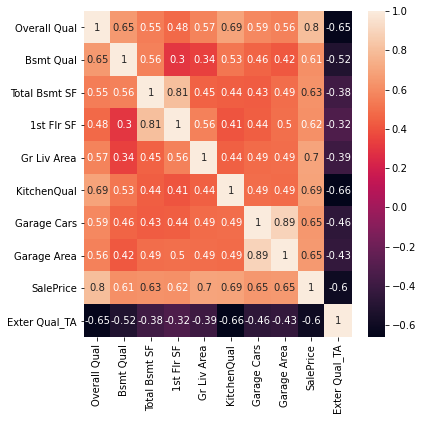

In [66]:
#Heatmap on high corr features
fig, ax = plt.subplots(figsize=(6,6))  
sns.heatmap(AmesHousing_train[top_high_corr_features_lst].corr(), annot=True)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

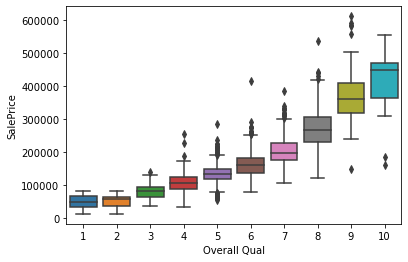

In [67]:
#Box plot by category 
sns.boxplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Overall Qual'])

<AxesSubplot:xlabel='Bsmt Qual', ylabel='SalePrice'>

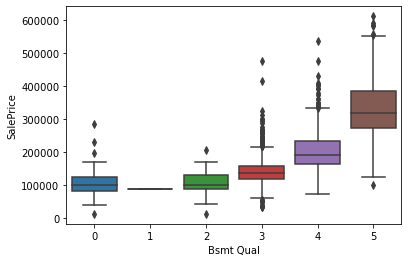

In [68]:
#Box plot by category 
sns.boxplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Bsmt Qual'])

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

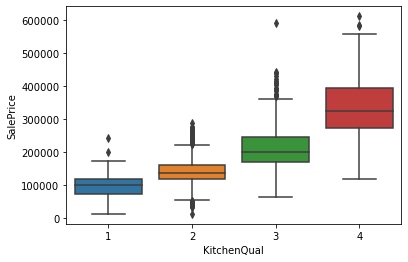

In [69]:
#Box plot by category 
sns.boxplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['KitchenQual'])

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

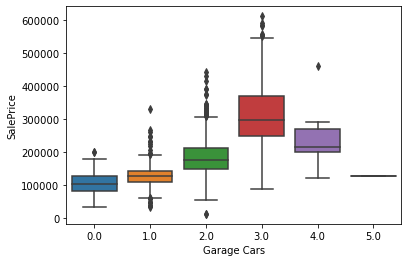

In [70]:
#Box plot by category 
sns.boxplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Garage Cars'])

<AxesSubplot:xlabel='Exter Qual_TA', ylabel='SalePrice'>

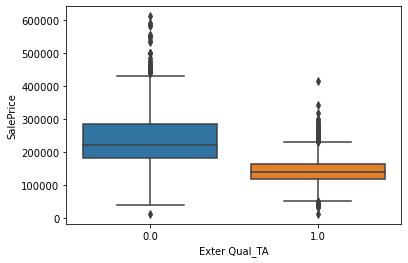

In [71]:
#Box plot by category 
sns.boxplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Exter Qual_TA'])

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

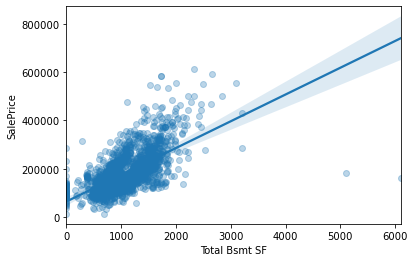

In [72]:
#scatter plot and trend line 
sns.regplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Total Bsmt SF'],scatter_kws={'alpha':0.3})

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

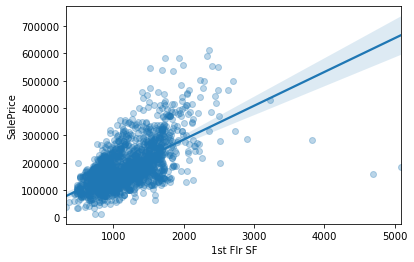

In [73]:
#scatter plot and trend line 
sns.regplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['1st Flr SF'],scatter_kws={'alpha':0.3})

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

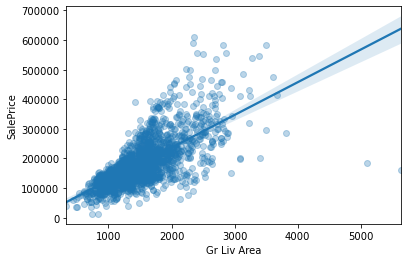

In [74]:
#scatter plot and trend line 
sns.regplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Gr Liv Area'],scatter_kws={'alpha':0.3})

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

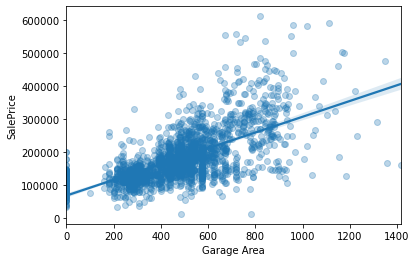

In [75]:
#scatter plot and trend line 
sns.regplot(y=AmesHousing_train['SalePrice'],x=AmesHousing_train['Garage Area'],scatter_kws={'alpha':0.3})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

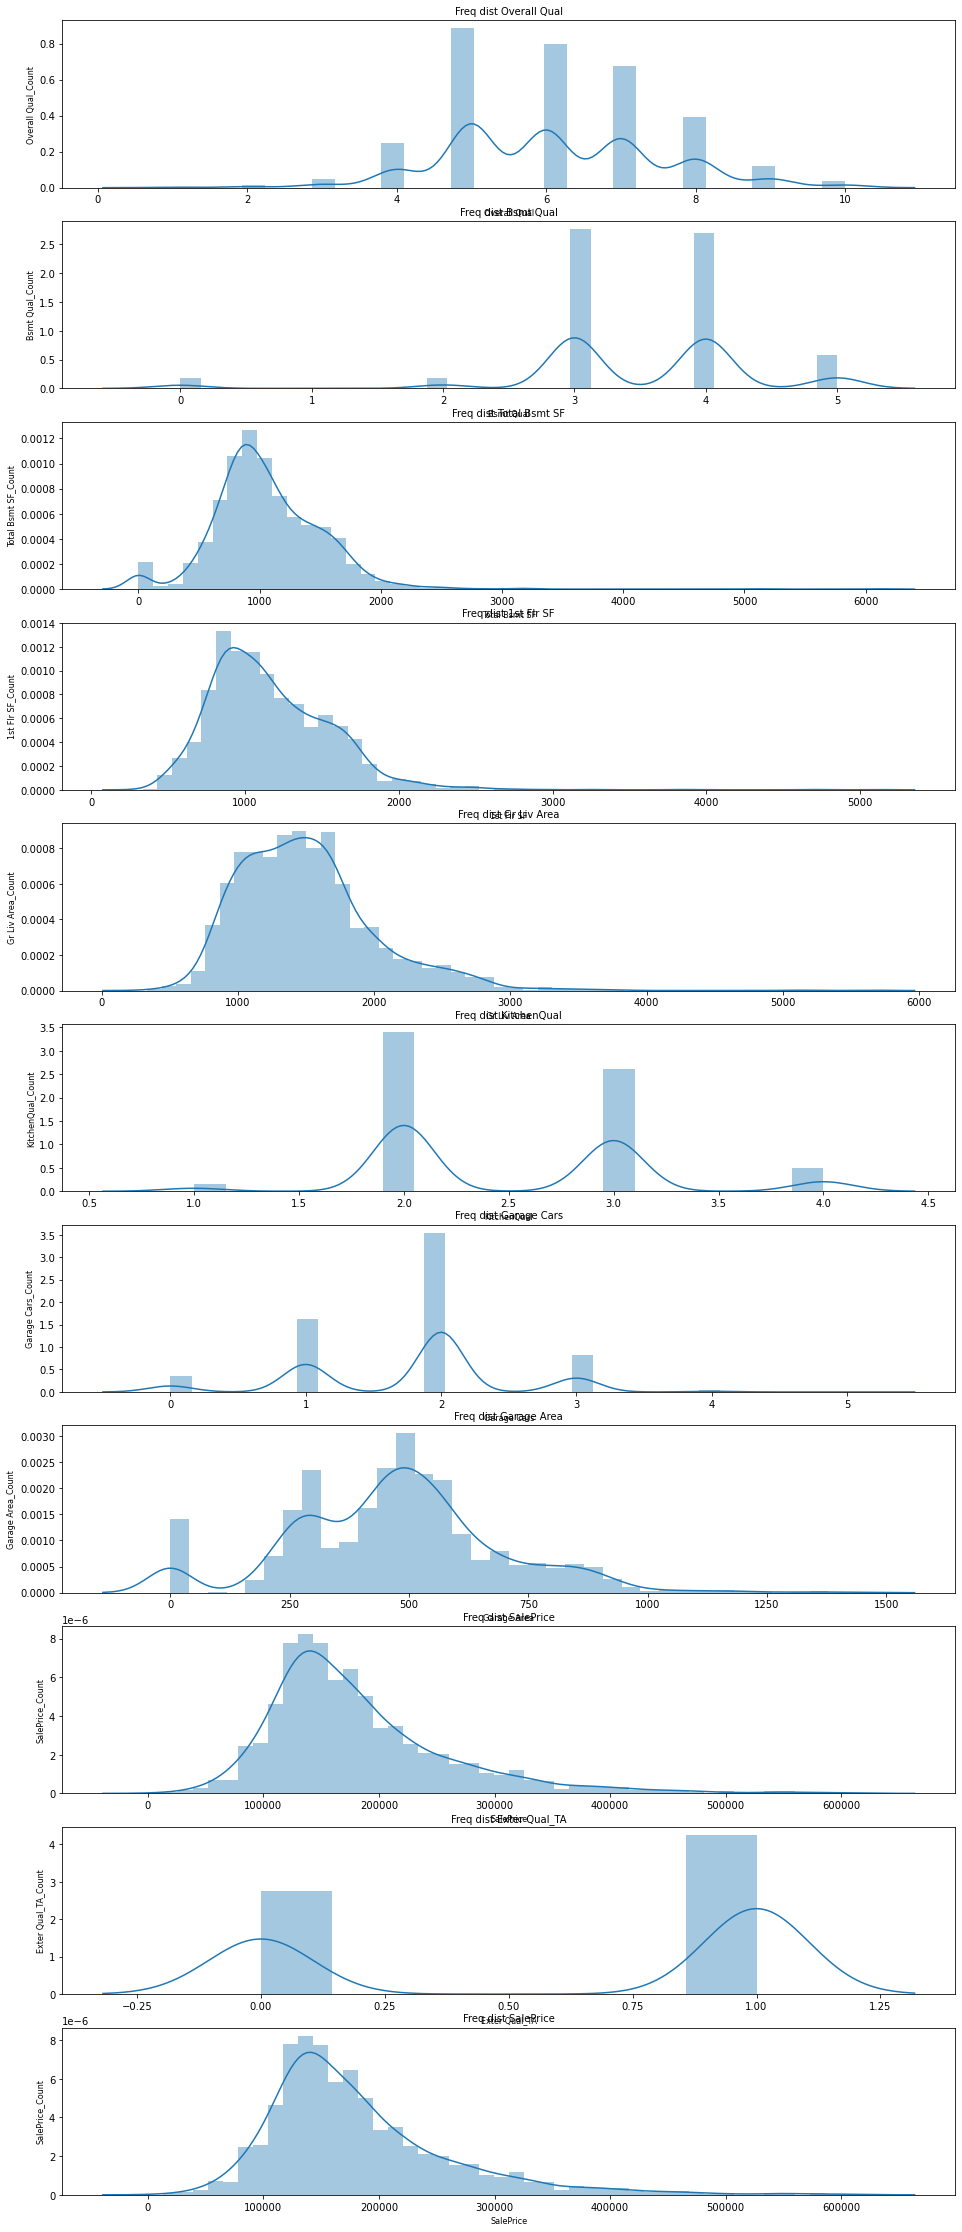

In [76]:
#Histogram on high corr features
col_names = top_high_corr_features_lst + ['SalePrice'] 

fig, ax = plt.subplots(len(col_names), figsize=(16,40))

for i, col_val in enumerate(col_names):

    sns.distplot(AmesHousing_train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel(col_val+'_Count', fontsize=8)

plt.show()

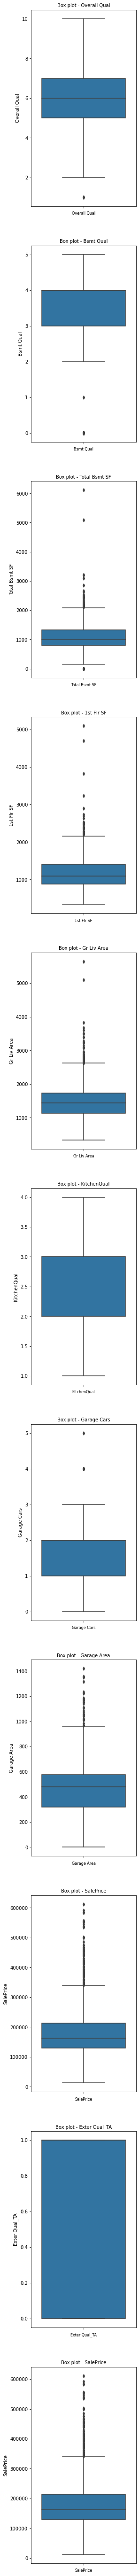

In [77]:
#Boxplot on high corr features
fig, ax = plt.subplots(len(col_names), figsize=(4,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=AmesHousing_train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [78]:
#remove target from the top_high_corr_features_ls
top_high_corr_features_lst.remove('SalePrice')

In [79]:
# create X and y for training
X_scaled = AmesHousing_train_scale[top_high_corr_features_lst]
y = AmesHousing_train['SalePrice']

In [80]:
X_scaled.shape

(2051, 9)

### PolynomialFeatures

In [81]:
# do StandardScaler and  PolynomialFeatures on Training data

poly = PolynomialFeatures(include_bias=False,interaction_only= True) #interaction= True
poly.fit(X_scaled)
X_poly = poly.transform(X_scaled)
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(top_high_corr_features_lst))

### Get predictors list after Normalize and PolynomialFeatures

In [82]:
# get predictors list after Normalize and PolynomialFeatures
predictors_lst = list(df_poly.columns)

### Split data to X,y Train and Test

In [83]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

# 4. First Liner Regression Model 

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
# see the score of model run on training data
first_model_score_on_training = lr.score(X_train, y_train)
first_model_score_on_training

0.8822947918246656

In [86]:
# see the score of model run on unseen train data
first_model_score_on_CV = cross_val_score(lr,X_train,y_train,cv=5).mean()
first_model_score_on_CV

0.8551251011861449

In [87]:
# see the score of model run on unseen test data
first_model_score_on_testing = lr.score(X_test,y_test)
first_model_score_on_testing

0.8907911992544846

In [88]:
predictions = lr.predict(X_train)
first_model_RMSE =  np.sqrt(metrics.mean_squared_error(y_train, predictions))
first_model_RMSE

27284.225660587046

In [89]:
AmesHousing['baseline'] = AmesHousing['SalePrice'].mean()
RMSE_baseline = np.sqrt(metrics.mean_squared_error(AmesHousing['SalePrice'], AmesHousing['baseline']))
RMSE_baseline

79239.33504161824

### The First LR model is better than Baseline model (  lower RMSE )

In [90]:
print('The First Linear Regression Model score on traing data  :', round(first_model_score_on_training,4) )
print('\nThe First Linear Regression Model score on CV           :', round(first_model_score_on_CV,4) )
print('\nThe First Linear Regression Model score on Testing data :', round(first_model_score_on_testing,4) )
print('\nThe First Linear Regression Model RMSE                  :', round(first_model_RMSE,0) )
print('\nThe Baseline Model RMSE                                 :', round(RMSE_baseline,0) )


The First Linear Regression Model score on traing data  : 0.8823

The First Linear Regression Model score on CV           : 0.8551

The First Linear Regression Model score on Testing data : 0.8908

The First Linear Regression Model RMSE                  : 27284.0

The Baseline Model RMSE                                 : 79239.0


# 5. Perform Regularization (Lasso) to get optimal Predictors

## Feature selection by using Lasso

In [91]:
# Create lasso , fit with training data and get hte best alpha
lasso = LassoCV(n_alphas=100)
lasso.fit(X_train, y_train)
best_lasso_alpha = lasso.alpha_

In [92]:
# do cross validation base on the best alpha
lasso_cv_scores = cross_val_score(Lasso(alpha=best_lasso_alpha), X_train, y_train, cv=5)
lasso_cv_scores.mean()

0.8580741446469189

### show the coef in each feature, see some features can be removed from the predictor list (coef = zero)

<AxesSubplot:>

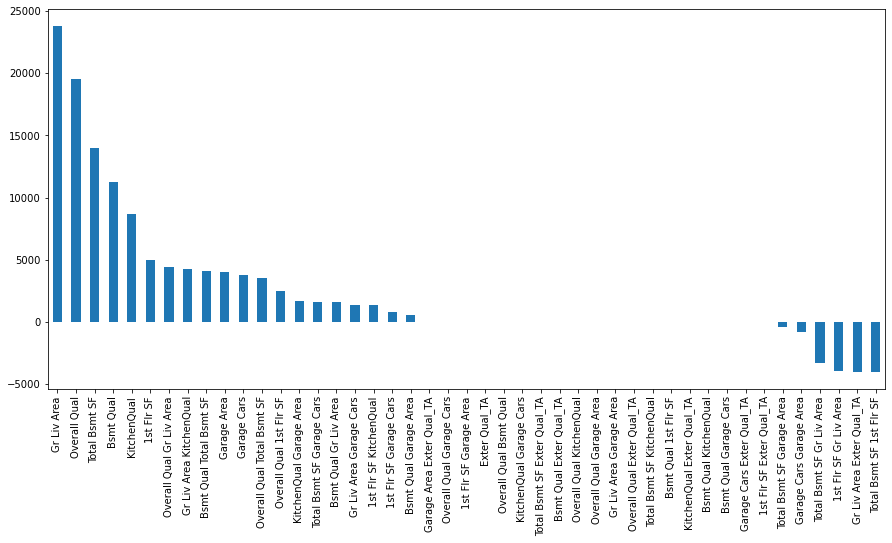

In [93]:
# show the coef in each feature, see some features can be removed from the predictor list
lasso.coef_
pd.Series(lasso.coef_, index=predictors_lst).sort_values(ascending=False).plot.bar(figsize=(15, 7))

In [94]:
# get cols with have zero coef
lasso_coef = pd.Series(lasso.coef_, index=predictors_lst)
lasso_coef_zero = lasso_coef[( lasso_coef == 0 ) ]
#pd.Series(lasso.coef_, index=predictors_lst).sort_values()

### Get final predictors list after removing zero coef features

In [95]:
# remove cols with have zero coef from predictors_lst
for tmp in lasso_coef_zero.index.values.tolist() :
    predictors_lst.remove(tmp)

# 6.Optimal Liner Regression Model by using Optimal-Predictors

In [96]:
# create X and y for training
X_scaled = AmesHousing_train_scale[top_high_corr_features_lst]
y = AmesHousing_train['SalePrice']

In [97]:
X_scaled.shape

(2051, 9)

In [98]:
# do StandardScaler and  PolynomialFeatures on Training data
poly.fit(X_scaled)
X_poly = poly.transform(X_scaled)
X_poly.shape 
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(top_high_corr_features_lst))

### Split data to X,y Train and Test based on optimal-predictor list

In [99]:
df_poly[predictors_lst].shape

(2051, 26)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df_poly[predictors_lst], y, random_state=42)

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
optimal_model_score_on_training = lr.score(X_train, y_train)
optimal_model_score_on_training

0.8802122515672486

In [103]:
optimal_model_score_on_CV = cross_val_score(lr,X_train,y_train,cv=5).mean()
optimal_model_score_on_CV

0.8600672093315154

In [104]:
optimal_model_score_on_testing = lr.score(X_test,y_test)
optimal_model_score_on_testing

0.8937492477401372

In [105]:
predictions = lr.predict(X_train)
optimal_model_RMSE =  np.sqrt(metrics.mean_squared_error(y_train, predictions))
optimal_model_RMSE

27524.535198234982

## The optimal model perform better than the first model
- the error (RMSE) on Testing data so this model is low bias
- the R square score on Testing data is better than Training data So Generalizability of this model is good 

In [106]:
print('The Optimal Linear Regression Model score on traing data  :', round(optimal_model_score_on_training,4) )
print('\nThe Optimal Linear Regression Model score on CV           :', round(optimal_model_score_on_CV.mean(),4) )
print('\nThe Optimal Linear Regression Model score on Testing data :', round(optimal_model_score_on_testing,4) )
print('\nThe Optimal Linear Regression Model RMSE                  :', round(optimal_model_RMSE,0) )

The Optimal Linear Regression Model score on traing data  : 0.8802

The Optimal Linear Regression Model score on CV           : 0.8601

The Optimal Linear Regression Model score on Testing data : 0.8937

The Optimal Linear Regression Model RMSE                  : 27525.0


In [107]:
print('The First Linear Regression Model score on traing data  :', round(first_model_score_on_training,4) )
print('\nThe First Linear Regression Model score on CV           :', round(first_model_score_on_CV,4) )
print('\nThe First Linear Regression Model score on Testing data :', round(first_model_score_on_testing,4) )
print('\nThe First Linear Regression Model RMSE                  :', round(first_model_RMSE,0) )
print('\nThe Baseline Model RMSE                                 :', round(RMSE_baseline,0) )

The First Linear Regression Model score on traing data  : 0.8823

The First Linear Regression Model score on CV           : 0.8551

The First Linear Regression Model score on Testing data : 0.8908

The First Linear Regression Model RMSE                  : 27284.0

The Baseline Model RMSE                                 : 79239.0


In [108]:
print(" Total number of final features is", len(predictors_lst),'\n\n','Here are all features in the final predictors list')
predictors_lst

 Total number of final features is 26 

 Here are all features in the final predictors list


['Overall Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'KitchenQual',
 'Garage Cars',
 'Garage Area',
 'Overall Qual Total Bsmt SF',
 'Overall Qual 1st Flr SF',
 'Overall Qual Gr Liv Area',
 'Bsmt Qual Total Bsmt SF',
 'Bsmt Qual Gr Liv Area',
 'Bsmt Qual Garage Area',
 'Total Bsmt SF 1st Flr SF',
 'Total Bsmt SF Gr Liv Area',
 'Total Bsmt SF Garage Cars',
 'Total Bsmt SF Garage Area',
 '1st Flr SF Gr Liv Area',
 '1st Flr SF KitchenQual',
 '1st Flr SF Garage Cars',
 'Gr Liv Area KitchenQual',
 'Gr Liv Area Garage Cars',
 'Gr Liv Area Exter Qual_TA',
 'KitchenQual Garage Area',
 'Garage Cars Garage Area']

### Interpret the model

In [141]:
coef_optimal_LR = lr.coef_
pd.Series(coef_optimal_LR, index=predictors_lst).sort_values(ascending=False)

Gr Liv Area                   24633.438487
Overall Qual                  18854.872756
Total Bsmt SF                 14928.468648
Bsmt Qual                     12130.255053
KitchenQual                    8620.173112
Garage Area                    4953.311341
1st Flr SF                     4536.066401
Overall Qual Gr Liv Area       4523.641901
Bsmt Qual Total Bsmt SF        4440.751029
Gr Liv Area KitchenQual        4341.873121
Overall Qual Total Bsmt SF     4229.589523
Garage Cars                    2821.434857
Total Bsmt SF Garage Cars      2617.693118
1st Flr SF Garage Cars         2521.579943
KitchenQual Garage Area        2134.536674
Bsmt Qual Garage Area          1918.870368
Overall Qual 1st Flr SF        1699.835645
1st Flr SF KitchenQual         1618.251514
Gr Liv Area Garage Cars        1503.383738
Bsmt Qual Gr Liv Area           705.051341
Total Bsmt SF Gr Liv Area     -1750.114138
Garage Cars Garage Area       -2017.435077
Total Bsmt SF Garage Area     -3095.806621
Total Bsmt 

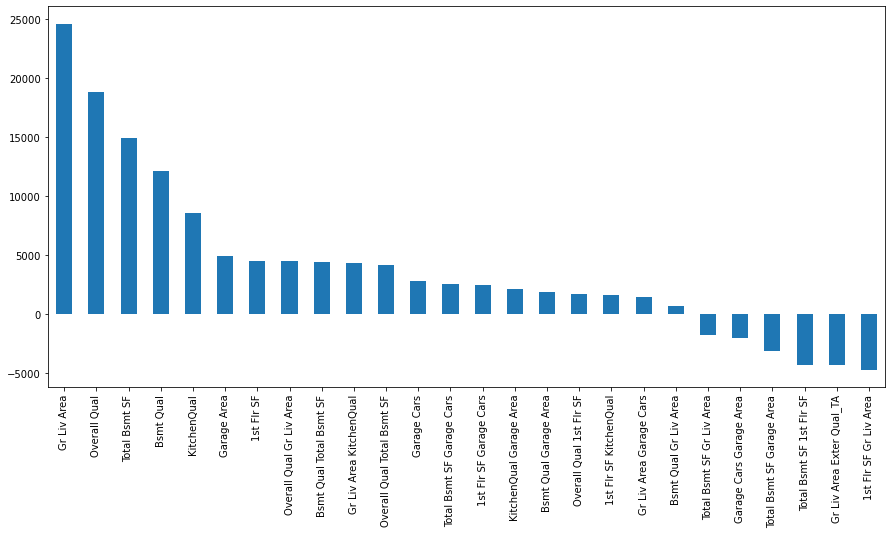

In [140]:
pd.Series(coef_optimal_LR, index=predictors_lst).sort_values(ascending=False).plot.bar(figsize=(15, 7))
#plt.savefig('coef_V1.jpg',dpi=600)

### we can interpret from the coef that if we expand the Ground living area square feet 1 unit we can increase the Sale Price about 24,633 US dollar

## !!! Required 8 Original features to generate the best predictors for predicting the SalePrice from Ames Housing Data !!!

In [135]:
original_feature_predictor = \
['Gr Liv Area',
 'Overall Qual',
 'Total Bsmt SF',
 'Bsmt Qual',
 'KitchenQual',
 'Garage Area', 
 '1st Flr SF',
 'Garage Cars',
 'Exter Qual_TA']

#### We do the feature engineering from original 8 features to be 26 features to be the best predictors in this model

In [112]:
print(" Total number of final features is", len(predictors_lst),'\n\n','Here are all features in the final predictors list')
predictors_lst

 Total number of final features is 26 

 Here are all features in the final predictors list


['Overall Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'KitchenQual',
 'Garage Cars',
 'Garage Area',
 'Overall Qual Total Bsmt SF',
 'Overall Qual 1st Flr SF',
 'Overall Qual Gr Liv Area',
 'Bsmt Qual Total Bsmt SF',
 'Bsmt Qual Gr Liv Area',
 'Bsmt Qual Garage Area',
 'Total Bsmt SF 1st Flr SF',
 'Total Bsmt SF Gr Liv Area',
 'Total Bsmt SF Garage Cars',
 'Total Bsmt SF Garage Area',
 '1st Flr SF Gr Liv Area',
 '1st Flr SF KitchenQual',
 '1st Flr SF Garage Cars',
 'Gr Liv Area KitchenQual',
 'Gr Liv Area Garage Cars',
 'Gr Liv Area Exter Qual_TA',
 'KitchenQual Garage Area',
 'Garage Cars Garage Area']

### Conclusion 

Top three features that make the house get a better price are:
1. Size of the Ground living area
    * every one square feet step up, the price increase about 24,633 US dollar 


2. Rates of the overall material quality
    * every one rate step up, the price increase about 18,854 US dollar


3. Size of basement area
    * every one square feet step up, the price increase about 14,928 US dollar
    
### House agency staffs should focus on house that has big groud living and basement area and also good material quality then they get high commision. 


# 7. Get prediction result from X_test and run Kaggle Challenge

### Load test data.

In [113]:
AmesHousing_test = pd.read_csv('datasets/test.csv')
AmesHousing_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [114]:
AmesHousing_test.shape

(879, 80)

### Data cleaning

### Mapping colname from data dict and Data source

In [115]:
dict_rename = {'Bedroom AbvGr':'Bedroom',
               'Kitchen AbvGr': 'Kitchen',
               'Fireplace Qu': 'FireplaceQu',
               'TotRms AbvGrd': 'TotRmsAbvGrd',
               'BsmtFin Type 2': 'BsmtFinType 2',
               '3Ssn Porch': '3-Ssn Porch',
               'Exterior 1st': 'Exterior 1',
               'Exterior 2nd': 'Exterior 2',
               'Heating QC': 'HeatingQC',
               'Kitchen Qual': 'KitchenQual',
    
}
AmesHousing_test.rename(columns=dict_rename, inplace=True)

### Missing Data value

###  Find all cols which have  null value

In [116]:
#get all cols which have null values in list
null_col_series = get_null_col_series(AmesHousing_test)
null_col_series[:10]

Pool QC          875
Misc Feature     838
Alley            821
Fence            707
FireplaceQu      422
Lot Frontage     160
Garage Cond       45
Garage Qual       45
Garage Yr Blt     45
Garage Finish     45
dtype: int64

   #### Replace the null values by proper values based on data dict type [ numerical or category ]

In [117]:
dict_type_col_null = get_dict_type_col_null(null_col_series)
dict_type_col_null

{'discreate': ['Garage Yr Blt'],
 'nominal': ['Misc Feature', 'Alley', 'Garage Type', 'Mas Vnr Type'],
 'ordinal': ['Pool QC',
  'Fence',
  'FireplaceQu',
  'Garage Cond',
  'Garage Qual',
  'Garage Finish',
  'Bsmt Exposure',
  'BsmtFin Type 1',
  'Bsmt Qual',
  'BsmtFinType 2',
  'Bsmt Cond',
  'Electrical'],
 'continuous': ['Lot Frontage', 'Mas Vnr Area']}

In [118]:
change_col_null_value(AmesHousing,AmesHousing_test,dict_type_col_null['discreate'],'median')
change_col_null_value(AmesHousing,AmesHousing_test,dict_type_col_null['continuous'],'mean')
change_col_null_value(AmesHousing,AmesHousing_test,dict_type_col_null['nominal'],'NONE')
change_col_null_value(AmesHousing,AmesHousing_test,dict_type_col_null['ordinal'],'NONE')

In [119]:
AmesHousing_test.isnull().sum().sort_values(ascending=False).head(5)

Sale Type         0
Yr Sold           0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
dtype: int64

### Feature Engineering same as Training data

In [120]:
# create the Year value to be the aging
AmesHousing_test['Year Built'] = 2020 - AmesHousing_test['Year Built']
AmesHousing_test['Year Remod/Add'] = 2020 - AmesHousing_test['Year Remod/Add']
AmesHousing_test['Garage Yr Blt'] = 2020 - AmesHousing_test['Garage Yr Blt']

#### Convert the category value in Ordinal cols to be the scale discreate value
We scale and rank value by information in the data dictionary

In [121]:
# map with value same as traing data
AmesHousing_test['Fence'] = AmesHousing_test['Fence'].map(map_dict_Fence) 
AmesHousing_test['Pool QC'] = AmesHousing_test['Pool QC'].map(map_dict_Pool_QC) 
AmesHousing_test['Paved Drive'] = AmesHousing_test['Paved Drive'].map(map_dict_Paved_Drive) 
AmesHousing_test['Garage Cond'] = AmesHousing_test['Garage Cond'].map(map_dict_Garage_Cond) 
AmesHousing_test['Garage Qual'] = AmesHousing_test['Garage Qual'].map(map_dict_Garage_Qual) 
AmesHousing_test['Garage Finish'] = AmesHousing_test['Garage Finish'].map(map_dict_Garage_Finish) 
AmesHousing_test['FireplaceQu'] = AmesHousing_test['FireplaceQu'].map(map_dict_FireplaceQu) 
AmesHousing_test['Functional'] = AmesHousing_test['Functional'].map(map_dict_Functional) 
AmesHousing_test['KitchenQual'] = AmesHousing_test['KitchenQual'].map(map_dict_KitchenQual) 
AmesHousing_test['Electrical'] = AmesHousing_test['Electrical'].map(map_dict_Electrical) 
AmesHousing_test['HeatingQC'] = AmesHousing_test['HeatingQC'].map(map_dict_HeatingQC) 
AmesHousing_test['BsmtFinType 2'] = AmesHousing_test['BsmtFinType 2'].map(map_dict_BsmtFin_Type_2) 
AmesHousing_test['BsmtFin Type 1'] = AmesHousing_test['BsmtFin Type 1'].map(map_dict_BsmtFin_Type_1) 
AmesHousing_test['Bsmt Exposure'] = AmesHousing_test['Bsmt Exposure'].map(map_dict_Bsmt_Exposure) 
AmesHousing_test['Bsmt Qual'] = AmesHousing_test['Bsmt Qual'].map(map_dict_Bsmt_Qual) 
AmesHousing_test['Land Slope'] = AmesHousing_test['Land Slope'].map(map_dict_Land_Slope) 
AmesHousing_test['Lot Shape'] = AmesHousing_test['Lot Shape'].map(map_dict_Lot_Shape) 
AmesHousing_test['Utilities'] = AmesHousing_test['Utilities'].map(map_dict_Utilities) 

### Encode the category cols by using OneHotEncoder

In [122]:
#  df which contains only category cols
AmesHousing_test[cat_lst].shape

(879, 24)

In [123]:
# create df which contains numerical cols
cols = [col for col in AmesHousing_test.columns if col not in cat_lst]
AmesHousing_test_num = AmesHousing_test[cols]
AmesHousing_test_num.shape

(879, 56)

In [124]:
# Use OneHotEncoder to endcode all category cols
AmesHousing_test_onehot_encoder= pd.DataFrame(myEncoder.transform(AmesHousing_test[cat_lst])
                                              ,columns =myEncoder.get_feature_names(AmesHousing_test[cat_lst].columns))   

In [125]:
# check Encoded data frame
AmesHousing_test_onehot_encoder.head(3)

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [126]:
# merge numerical cols and Encoded category cols
AmesHousing_test_ready = pd.merge(AmesHousing_test_num, AmesHousing_test_onehot_encoder, left_index=True, right_index=True)

In [127]:
#AmesHousing_test_cat = pd.get_dummies(AmesHousing_test, columns=cat_lst,drop_first=True)
AmesHousing_test_ready.head(3)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,2658,902301120,190,69.0000,9142,3,3,2,6,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2718,905108090,90,69.0552,9662,2,3,2,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2414,528218130,60,58.0000,17104,2,3,2,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### StandardScaler and PolynomialFeatures
need to do normalization because the scale of valuse in each cols are not same

In [128]:
AmesHousing_test_ready.shape

(879, 232)

In [129]:
# create Xtest for prediction 
cols_train = [col for col in AmesHousing_test_ready.columns if col not in ['SalePrice']]
Xtest = AmesHousing_test_ready[cols_train]

In [130]:
# do StandardScaler and 
X_scaled = ss.transform(Xtest)
df_X_scaled  = pd.DataFrame(X_scaled, columns=cols_train)
X_scaled = df_X_scaled[top_high_corr_features_lst]

In [131]:
# do PolynomialFeatures 

X_poly = poly.transform(X_scaled)
X_poly.shape 

df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(top_high_corr_features_lst))

### Get prediction result

In [132]:
# the final predictors list
len(predictors_lst)

26

In [133]:
#get prediction in data frame format
ypred = pd.DataFrame({'SalePrice': pd.Series(lr.predict(df_poly[predictors_lst]))})

In [134]:
#get outout format file
output_csv = pd.merge(AmesHousing_test_ready, ypred, left_index=True, right_index=True)
output_csv[['Id','SalePrice']].to_csv('DSI_Project2_v1.1.csv', index=False)

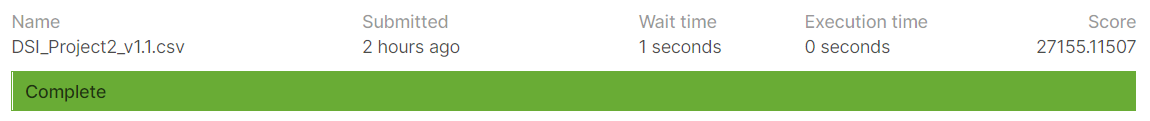